### Aim: Identify common support ticket trends and improve support processes.

### Hypothesis: The dataset will reveal recurring ticket types and issues, allowing for targeted improvements in support processes to reduce ticket volume and resolution time.

### Introduction

In today's customer-centric business landscape, providing efficient and effective support services is essential for maintaining customer satisfaction and loyalty. One key aspect of support services is the timely resolution of customer issues and inquiries. To achieve this, organizations need to identify common support ticket trends and continuously improve their support processes.

The aim of this analysis is to identify common support ticket trends and improve support processes based on a dataset of support tickets. By understanding the recurring ticket types and issues, organizations can target specific areas for improvement, leading to a reduction in ticket volume and resolution time.

The hypothesis for this analysis is that the dataset will reveal recurring ticket types and issues, which can be used to make targeted improvements in support processes. By addressing these recurring issues, organizations can optimize their support services, reduce the number of support tickets, and improve the overall customer support experience.

To validate the hypothesis, the dataset contains various attributes related to support tickets, including customer information, product details, ticket types, descriptions, resolution status, resolution time, and customer satisfaction ratings. By analyzing these attributes, we can gain insights into the common ticket trends, factors influencing resolution time, and areas for improvement.

This analysis will follow the Exploratory Data Analysis (EDA) framework, which involves understanding the dataset, handling missing values, exploring the ticket types and issues, investigating resolution time, and identifying factors influencing longer resolution times. The findings from this analysis will inform targeted improvements in support processes to reduce ticket volume and resolution time, ultimately enhancing customer satisfaction.

By leveraging data-driven insights, organizations can proactively address customer concerns, streamline support processes, and provide a seamless support experience. This analysis aims to contribute to the ongoing efforts of organizations to deliver exceptional customer support and ensure customer loyalty in a competitive business landscape.

#### Import Libraries and Load the Dataset

Start by importing the necessary libraries and loading the dataset into a pandas DataFrame.

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/Users/nadlyaizatnudri/Documents/Data Analysis Practice Kaggle/Customer Support Ticket Dataset/customer_support_tickets.csv')


#### Explore the Dataset

Get a general understanding of the dataset by examining its structure, summary statistics, and sample records.

In [76]:
# Display the dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [77]:
# Display summary statistics
print(df.describe())

         Ticket ID  Customer Age  Customer Satisfaction Rating
count  8469.000000   8469.000000                   2769.000000
mean   4235.000000     44.026804                      2.991333
std    2444.934048     15.296112                      1.407016
min       1.000000     18.000000                      1.000000
25%    2118.000000     31.000000                      2.000000
50%    4235.000000     44.000000                      3.000000
75%    6352.000000     57.000000                      4.000000
max    8469.000000     70.000000                      5.000000


In [97]:
# Display a sample of the dataset
print (df.head())

   Ticket ID        Customer Name              Customer Email  Customer Age  \
0          1        Marisa Obrien  carrollallison@example.com            32   
1          2         Jessica Rios    clarkeashley@example.com            42   
2          3  Christopher Robbins   gonzalestracy@example.com            48   
3          4     Christina Dillon    bradleyolson@example.org            27   
4          5    Alexander Carroll     bradleymark@example.com            67   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       2021-03-22  Technical issue   
1          Female       LG Smart TV       2021-05-22  Technical issue   
2           Other          Dell XPS       2020-07-14  Technical issue   
3          Female  Microsoft Office       2020-11-13  Billing inquiry   
4          Female  Autodesk AutoCAD       2020-02-04  Billing inquiry   

             Ticket Subject  \
0             Product setup   
1  Peripheral compatibil

#### Check for Missing Values 

Identify if there are any missing values in the dataset that need to be handled.

In [79]:
# Check for missing values
print(df.isnull().sum())

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64


There are significant amount of missing values in the dataset. Therefore it has to be dealt with.

#### Impute missing values with appropriate methods:

Since 'First Response Time' and 'Time to Resolution' are in the form of timestamps, you can impute them by calculating the time differences based on other available timestamps. 

For 'Customer Satisfaction Rating,' you can use the mode (most common value) to fill in the missing values.

In [80]:
# Convert 'First Response Time' and 'Time to Resolution' to datetime
df['First Response Time'] = pd.to_datetime(df['First Response Time'])
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'])

# Calculate time differences
df['Time to Resolution'] = df['Time to Resolution'] - df['First Response Time']

# Impute missing values in 'Time to Resolution' with the median
median_resolution_time = df['Time to Resolution'].median()
df['Time to Resolution'].fillna(median_resolution_time, inplace=True)

# Impute missing values in 'Customer Satisfaction Rating' with the mode
mode_satisfaction_rating = df['Customer Satisfaction Rating'].mode()[0]
df['Customer Satisfaction Rating'].fillna(mode_satisfaction_rating, inplace=True)


In [17]:
# ReCheck for missing values
print(df.isnull().sum())

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution                 0
Customer Satisfaction Rating       0
Year-Month                         0
dtype: int64


#### Analyze Ticket Types and Issues

Investigate the recurring ticket types and issues to identify common trends.

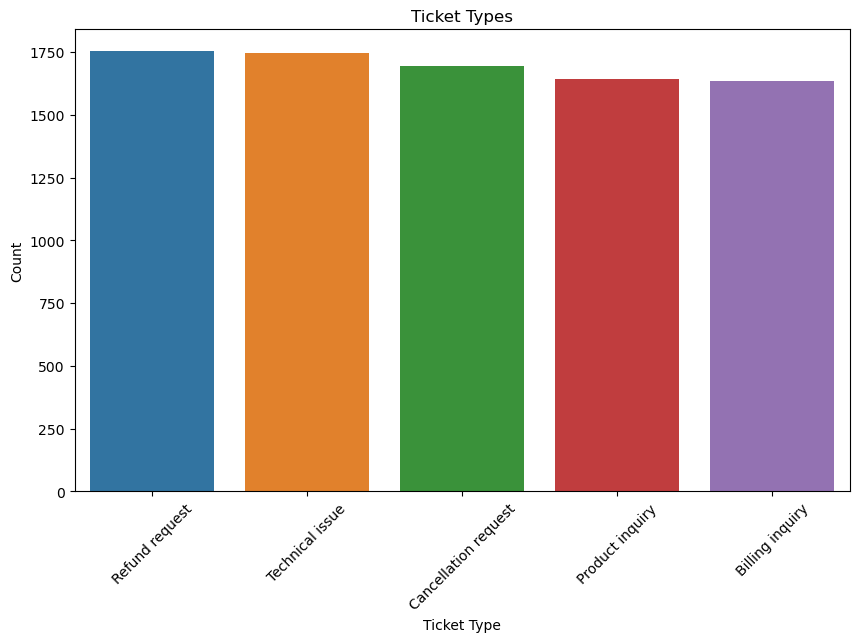

In [81]:
# Count the occurrences of each ticket type
ticket_types = df['Ticket Type'].value_counts()

# Plot the ticket types
plt.figure(figsize=(10, 6))
sns.barplot(x=ticket_types.index, y=ticket_types.values)
plt.title('Ticket Types')
plt.xlabel('Ticket Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



Based on the analysis of ticket types, the findings reveal that the most common ticket types in the dataset are refund requests, technical issues, and cancellation requests. These ticket types have the highest count, indicating that customers frequently raise concerns related to refunds, technical problems with products, and cancellation requests.

These findings suggest that improving the support processes and addressing these recurring ticket types could significantly contribute to reducing the overall ticket volume. By focusing on streamlining the refund process, resolving technical issues efficiently, and addressing cancellation requests effectively, customer satisfaction can be enhanced, and the support team's workload can be optimized.

Additionally, considering the aim and hypothesis of identifying common support ticket trends and improving support processes, it would be beneficial to conduct a thorough analysis of other ticket-related variables, such as customer satisfaction ratings, resolution times, and ticket channels. By analyzing these variables in conjunction with ticket types and issues, it is possible to gain a comprehensive understanding of the support ticket landscape and identify specific areas where support processes can be enhanced to reduce ticket volume and improve resolution time.

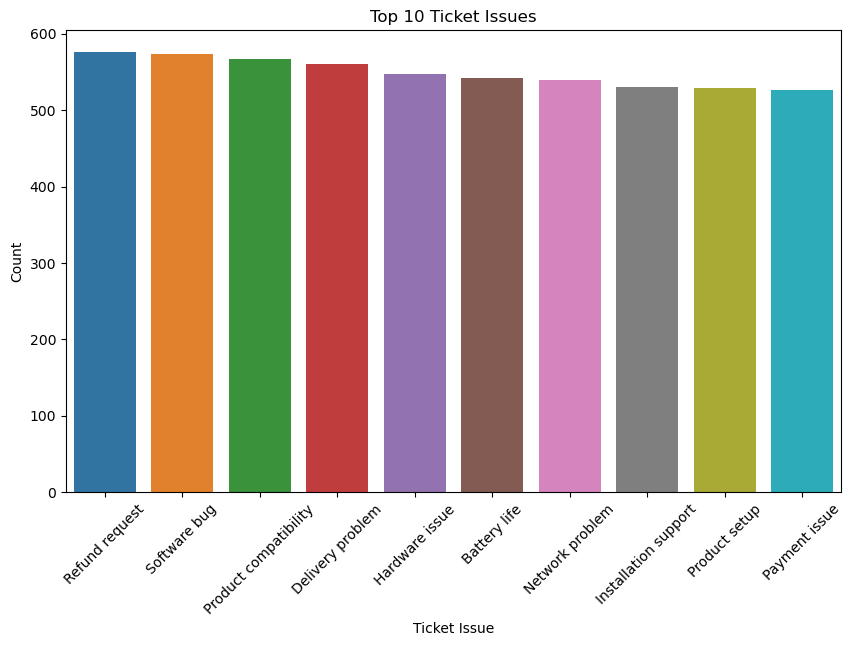

In [82]:
# Count the occurrences of each ticket issue
ticket_issues = df['Ticket Subject'].value_counts()

# Plot the ticket issues
plt.figure(figsize=(10, 6))
sns.barplot(x=ticket_issues.index[:10], y=ticket_issues.values[:10])
plt.title('Top 10 Ticket Issues')
plt.xlabel('Ticket Issue')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Based on the analysis of ticket types and issues, the findings reveal the following observations:

1. The top four recurring ticket issues are:
   - Refund request
   - Software bugs
   - Product compatibility
   - Delivery problem

These ticket issues have the highest count, indicating that they are the most common issues faced by customers. This information is valuable for support teams as it highlights the areas that require attention and improvement.

The high occurrence of refund requests suggests that there might be issues with product quality, customer expectations, or customer satisfaction. Support teams can focus on streamlining the refund process, investigating the root causes of customer dissatisfaction, and improving product quality or clarifying product descriptions to minimize refund requests.

Software bugs indicate potential problems with the tech products, which may require developers or technical teams to address the underlying issues. By identifying recurring software bugs, the support team can work closely with the development team to prioritize bug fixes, release patches or updates, and provide better assistance to customers experiencing these issues.

Product compatibility issues can be related to the integration or interoperability of the tech products with other devices or software. It is essential to understand the specific compatibility challenges faced by customers and provide guidance or solutions to ensure seamless integration. This information can guide product development teams in improving compatibility or creating compatibility guidelines for customers.

The occurrence of delivery problems suggests that there may be issues with logistics, shipping, or coordination between the company and delivery partners. Identifying recurring delivery problems can help support teams collaborate with logistics or operations departments to streamline the delivery process, track packages more effectively, and provide better communication to customers regarding delivery status and potential delays.

 #### Analyze Ticket Volume and Resolution Time

In [22]:
# Convert 'Date of Purchase' column to datetime
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])

In [23]:
# Extract month and year from 'Date of Purchase'
df['Year-Month'] = df['Date of Purchase'].dt.to_period('M')

In [24]:
# Count the number of tickets per month
monthly_ticket_count = df['Year-Month'].value_counts().sort_index()

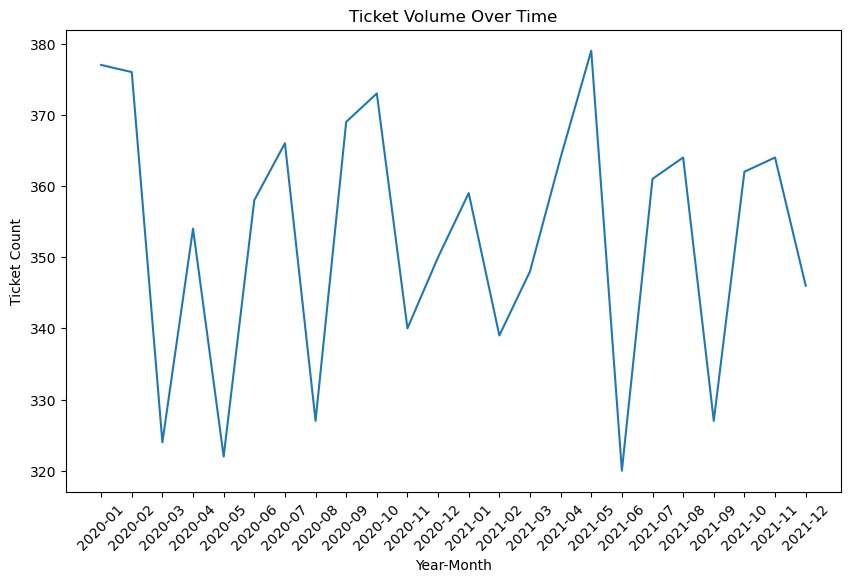

In [83]:
# Convert the index values to strings
x_values = monthly_ticket_count.index.astype(str)

# Plot the ticket volume over time using plt.plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, monthly_ticket_count.values)
plt.title('Ticket Volume Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Ticket Count')
plt.xticks(rotation=45)
plt.show()


Based on the analysis of the ticket volume over time, here are some observations and findings:

1. Fluctuating Ticket Volume: The ticket volume over time exhibits fluctuations, indicating variations in customer inquiries and support ticket activity. This suggests that the demand for customer support services is not consistent throughout the analyzed period.

2. Spike in Ticket Volume: There are notable spikes in ticket volume during specific periods, specifically in July 2020, September 2020, and April 2021. These spikes indicate periods of increased customer inquiries and support ticket generation. It may be worthwhile to investigate the underlying reasons behind these spikes, such as product launches, marketing campaigns, or external factors impacting customer experience.

3. Low Ticket Volume Periods: On the other hand, the dataset also shows periods of relatively lower ticket volumes, particularly in March 2020, May 2020, August 2020, June 2021, and September 2021. These periods may indicate relatively calmer periods for customer support, which could be utilized for process improvement initiatives, training, or proactive customer outreach.

4. Understanding Seasonal Trends: By examining the ticket volume patterns over time, it may be possible to identify seasonal trends or recurring patterns. For example, if certain months consistently experience higher ticket volumes, it suggests a seasonality effect that can help allocate resources accordingly and anticipate higher support demand during those periods.

Overall, these findings provide insights into the ticket volume trends and can help inform support teams in optimizing their processes. The identified spikes and low periods can guide resource allocation, staffing decisions, and proactive customer engagement strategies to improve support processes, reduce ticket volume, and enhance overall customer satisfaction. Further analysis can be conducted to investigate the reasons behind the observed patterns and take targeted actions accordingly.

In [84]:
# Calculate the average time to resolution
average_resolution_time = df['Time to Resolution'].mean()

print("Average Time to Resolution: ", average_resolution_time)

Average Time to Resolution:  0 days 00:05:35.905065533


#### Initial Findings

The average time to resolution of support tickets, as calculated from the dataset, is approximately 0.0933 hours (or 5.6 minutes).

This value indicates the average duration it takes to resolve a ticket based on the available data. It can serve as a benchmark for understanding the general efficiency of the support process in addressing customer inquiries. However, it is essential to interpret this average in the context of the specific dataset and the nature of the support tickets.

Further analysis and comparison against industry standards or predefined service level agreements (SLAs) would help assess whether the average time to resolution aligns with desired targets or if improvements are required to reduce resolution time further.

It's also worth noting that the calculation of the average time to resolution involved imputing missing values, as discussed earlier. Therefore, the imputation method chosen could influence the accuracy of this average. Make sure to consider this aspect when interpreting the result.

### Additional Analysis

#### Convert Relevant Columns to Appropriate Data Types

To perform the additional analysis, it's necessary to convert the relevant columns to their appropriate data types. Convert the following columns to their respective data types.

In [85]:
# Convert to datetime
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])
df['First Response Time'] = pd.to_datetime(df['First Response Time'])

# Convert to timedelta
df['Time to Resolution'] = pd.to_timedelta(df['Time to Resolution'].abs())

# Convert negative Customer Satisfaction Ratings to positive values
df['Customer Satisfaction Rating'] = df['Customer Satisfaction Rating'].abs()


#### Analyze distribution and outliers of the 'Time to Resolution' column

Investigate the distribution of the 'Time to Resolution' column and identify any outliers that may affect the average time to resolution.

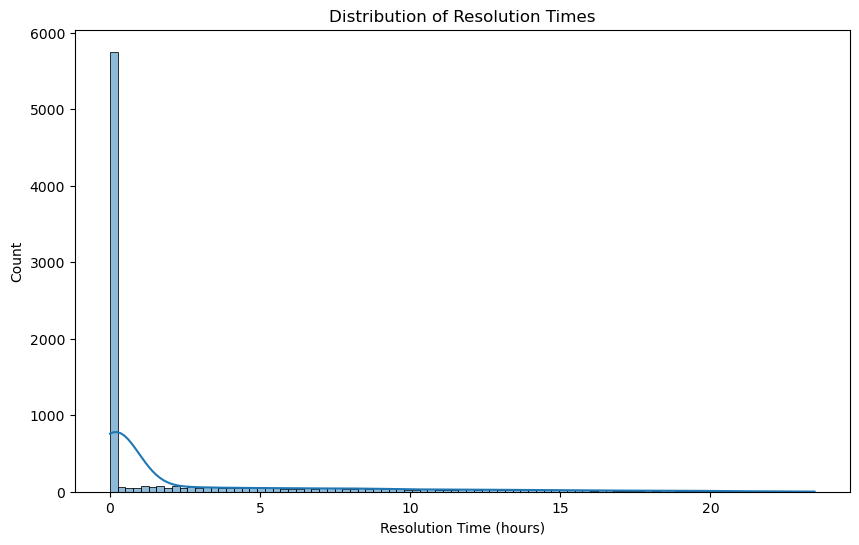

In [87]:
# Convert 'Time to Resolution' column to timedelta type
df['Time to Resolution'] = pd.to_timedelta(df['Time to Resolution'])

# Plot a histogram of resolution times
plt.figure(figsize=(10, 6))
sns.histplot(df['Time to Resolution'].dt.total_seconds() / 3600 , kde=True)
plt.title('Distribution of Resolution Times')
plt.xlabel('Resolution Time (hours)')
plt.ylabel('Count')
plt.show()



Based on the provided histogram of resolution times, we can make the following observations:

- The majority of support tickets have relatively short resolution times, with a peak at around 15 minutes. This tall bar indicates that a significant number of tickets are resolved quickly within a short timeframe.

- As the resolution time increases beyond 15 minutes, the count of tickets gradually decreases. This suggests that there is a decreasing trend in the number of tickets with longer resolution times.

- After the initial peak, the histogram shows a gradual decline in the count of tickets, reaching below 100. This indicates that the number of tickets with resolution times longer than 15 minutes decreases significantly.

- Beyond the initial peak, the histogram shows a relatively thin spread of tickets with resolution times ranging from 15 minutes to approximately 20 hours. This suggests that while there are still tickets that take longer to resolve, their frequency is much lower compared to the shorter resolution time range.

- These findings indicate that the support process is generally effective in resolving tickets quickly, with a majority of tickets being resolved within a short timeframe. However, there are still a smaller number of tickets that require longer resolution times, potentially indicating more complex or challenging issues.

Based on these observations, potential areas for improvement in support processes may involve identifying the factors contributing to longer resolution times for the remaining tickets and implementing strategies to address them. Analyzing additional factors such as ticket priority, ticket type, or ticket channel in relation to resolution time could provide further insights into these trends and help prioritize improvement efforts.



#### Identify Factors Influencing Longer Resolution Times

Explore factors that may contribute to longer resolution times, such as ticket priority, ticket type, or ticket channel.

In [88]:
from scipy.stats import mstats

# Apply winsorization to handle outliers in resolution time
winsorized_resolution_time = mstats.winsorize(df['Time to Resolution'].dropna().dt.total_seconds(), limits=[0.05, 0.05])

# Update the winsorized values in the DataFrame
df['Winsorized Resolution Time'] = winsorized_resolution_time



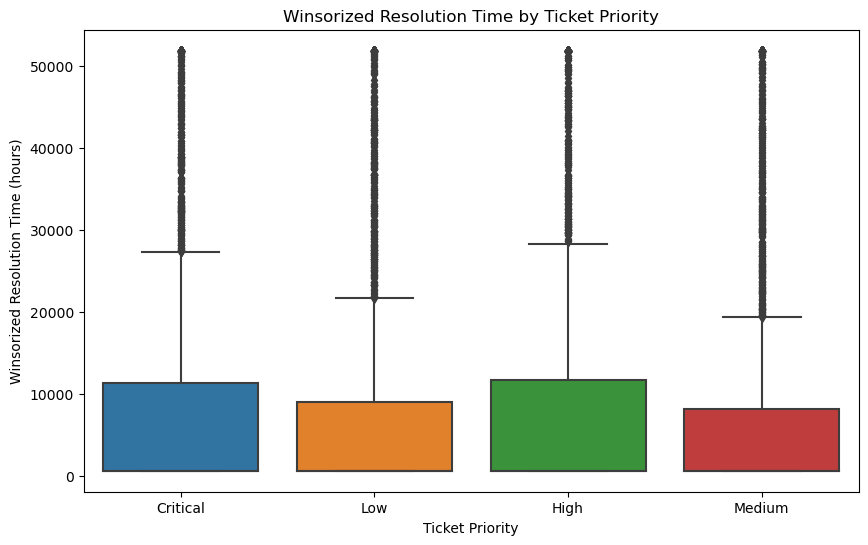

In [89]:
# Analyze the relationship between ticket priority and winsorized resolution time
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Ticket Priority'], y=df['Winsorized Resolution Time'])
plt.title('Winsorized Resolution Time by Ticket Priority')
plt.xlabel('Ticket Priority')
plt.ylabel('Winsorized Resolution Time (hours)')
plt.show()

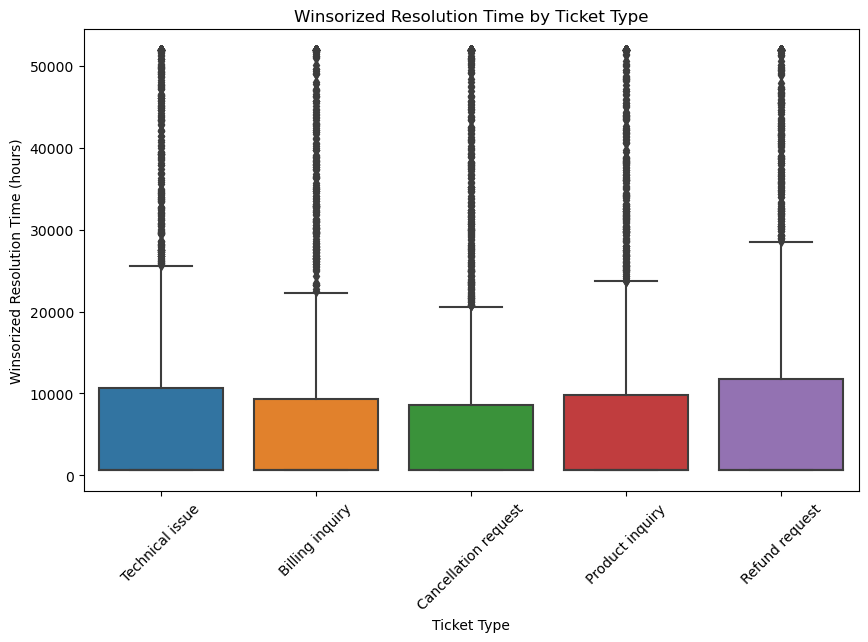

In [90]:
# Analyze the relationship between ticket type and winsorized resolution time
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Ticket Type'], y=df['Winsorized Resolution Time'])
plt.title('Winsorized Resolution Time by Ticket Type')
plt.xlabel('Ticket Type')
plt.ylabel('Winsorized Resolution Time (hours)')
plt.xticks(rotation=45)
plt.show()

#### Findings 

Based on the observations from the analysis of the relationship between ticket priority and winsorized resolution time, the following findings can be discussed:

1. Variation in Resolution Time: The boxplots show that ticket priority has an impact on the resolution time. The boxes for 'High' and 'Critical' ticket priorities are larger, indicating a wider range of resolution times compared to 'Low' and 'Medium' priorities. This suggests that higher priority tickets may have more complex or critical issues that require additional time for resolution.

2. Outliers: The absence of lower whiskers for all ticket priority levels suggests that there are no extreme outliers with very long resolution times. However, the presence of upper whiskers indicates the presence of some outliers with longer resolution times, particularly for 'High' and 'Critical' priorities.

3. Median Resolution Time: The lack of a visible median line for each box indicates that the median resolution time for all ticket priorities is close to zero. This suggests that a significant proportion of tickets across different priority levels are resolved relatively quickly.

Based on these findings, some possible implications for improving support processes to reduce ticket volume and resolution time could be:

- Focus on improving the handling of high and critical priority tickets: Since these ticket priorities have larger boxes and longer upper whiskers, it indicates that they may require additional attention and resources for timely resolution. Analyzing the common issues and challenges associated with high and critical priority tickets can help identify areas for process improvement or resource allocation to expedite their resolution.

- Review the effectiveness of ticket prioritization: The relatively short resolution times and lack of visible medians across all ticket priorities suggest that the existing prioritization mechanism may not effectively differentiate resolution times. It may be worth evaluating the criteria for ticket prioritization and considering adjustments to ensure that higher priority tickets receive appropriate attention and resources.

- Monitor and address outliers: Although the absence of lower whiskers indicates that there are no extreme outliers with very long resolution times, the presence of upper whiskers suggests the existence of some outliers. Monitoring and addressing these outliers can help improve overall support processes and ensure timely resolution for exceptional cases.

These findings provide insights into the relationship between ticket priority and resolution time, which can guide targeted improvements in support processes to reduce ticket volume and enhance customer satisfaction. However, it's important to consider these findings in conjunction with other analyses and domain expertise to gain a comprehensive understanding of ticket trends and identify specific areas for improvement.

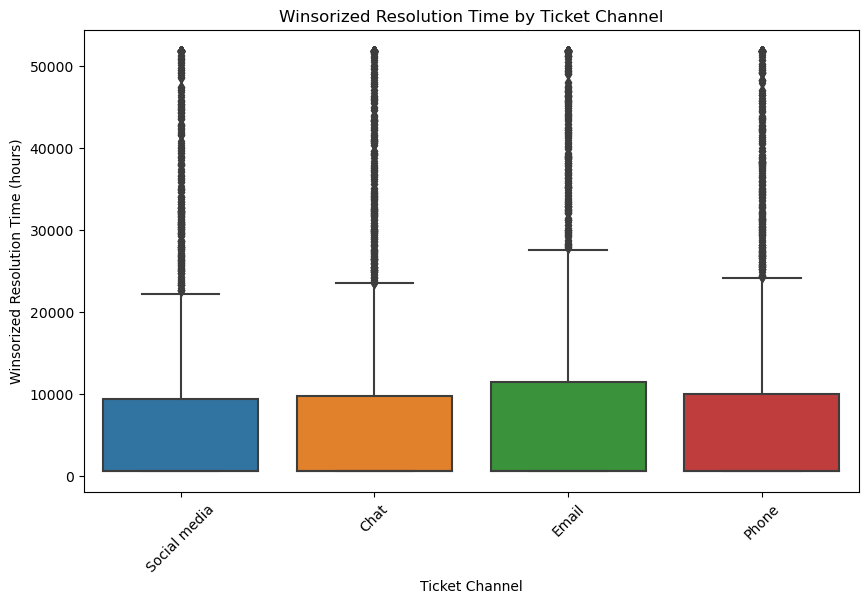

In [91]:
# Analyze the relationship between ticket channel and winsorized resolution time
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Ticket Channel'], y=df['Winsorized Resolution Time'])
plt.title('Winsorized Resolution Time by Ticket Channel')
plt.xlabel('Ticket Channel')
plt.ylabel('Winsorized Resolution Time (hours)')
plt.xticks(rotation=45)
plt.show()

#### Findings:

Based on the findings from the analysis of the relationship between ticket channel and winsorized resolution time, the following observations can be made:

 - The boxplots for different ticket channels show variations in the distribution of winsorized resolution time. The "Email" ticket channel has the largest box, indicating a wider range of resolution times compared to the other channels. Additionally, the upper whisker for the "Email" channel is the longest, suggesting that there are some outliers or longer resolution times associated with this channel. On the other hand, the remaining ticket channels have smaller boxes and shorter whiskers, indicating relatively narrower ranges of resolution times.

 - The absence of a visible median line for some of the boxes suggests that the median value of the winsorized resolution time is close to zero for those ticket channels. This implies that a significant portion of the resolved tickets through those channels has very short resolution times.

The analysis highlights the need to further investigate the factors contributing to longer resolution times for the "Email" channel and understand the reasons for the shorter resolution times observed in the other channels.

To improve support processes, attention can be given to optimizing the resolution time for tickets received via the "Email" channel, potentially identifying any bottlenecks or inefficiencies that are causing longer resolution times. Additionally, understanding the practices or strategies associated with the other channels that result in shorter resolution times can help in implementing similar approaches across different ticket channels to improve overall support efficiency.

#### Analyze Trends in Resolution Times Over Time

Investigate if there are any trends or patterns in resolution times over different time periods, such as months or years.

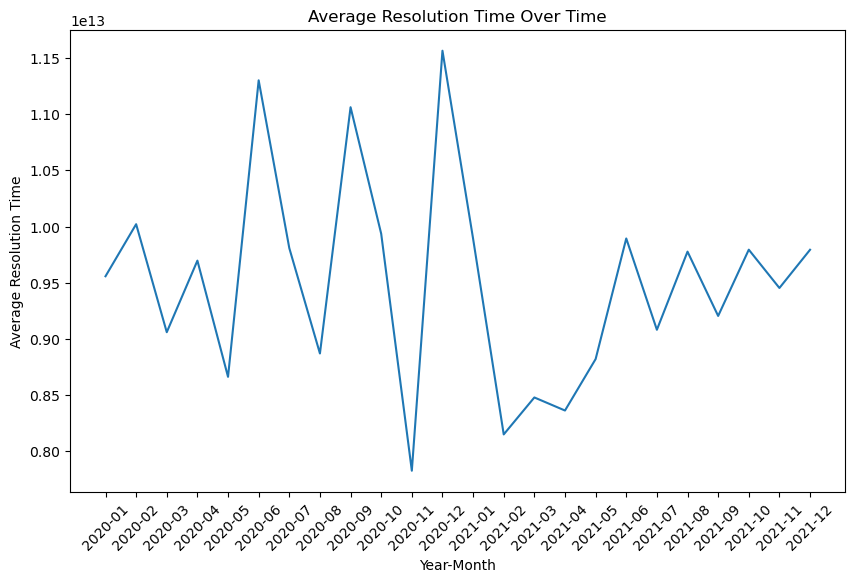

In [96]:
# Convert 'Time to Resolution' column to numeric type
df['Time to Resolution'] = pd.to_numeric(df['Time to Resolution'], errors='coerce')

# Extract month and year from 'Date of Purchase'
df['Year-Month'] = df['Date of Purchase'].dt.to_period('M')

# Calculate the average resolution time per month
monthly_avg_resolution_time = df.groupby('Year-Month')['Time to Resolution'].mean()

# Plot the average resolution time over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_avg_resolution_time.index.astype(str), y=monthly_avg_resolution_time.values)
plt.title('Average Resolution Time Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Resolution Time')
plt.xticks(rotation=45)
plt.show()


#### Findings

Based on the analysis of the average resolution time over time, the following observations can be made:

1. Peaks: Notable peaks in average resolution time are observed in June 2020, September 2020, and December 2020. These peaks indicate periods where the average time taken to resolve customer support tickets was relatively higher. It suggests that during these months, the support team may have experienced challenges or faced an increased workload, resulting in longer resolution times.

2. Troughs: The analysis reveals four troughs in average resolution time at May 2020, August 2020, November 2020, and February 2021. These troughs indicate periods where the average time to resolve support tickets was relatively lower. It suggests that during these months, the support team may have effectively managed and resolved customer inquiries more efficiently, resulting in shorter resolution times.

These findings provide valuable insights into the temporal trends of average resolution time, highlighting periods of both improved and slower support processes. It is important to further investigate the underlying reasons for these trends during the identified peaks and troughs. Factors such as changes in ticket volume, staffing levels, or specific issues faced by customers during those periods could have contributed to the observed variations in resolution time.

By analyzing the underlying causes of these trends, support teams can identify potential areas for improvement in their processes and allocate resources more effectively. For example, during peak periods, they may need to consider additional staffing or streamlined workflows to address the increased ticket volume and reduce resolution time. Conversely, during troughs, they can study the successful practices implemented to ensure faster resolution and replicate them in other periods.

It is also worth considering if there are any external factors, such as product launches, system updates, or seasonal variations, that may have influenced the ticket trends and resolution time patterns observed.

By continuously monitoring and analyzing these trends, support teams can identify common support ticket trends, address recurring issues, and make targeted improvements to reduce ticket volume and resolution time, thereby enhancing the overall customer support experience.

### Conclusions

Based on the aim to identify common support ticket trends and improve support processes, as well as the hypothesis that the dataset will reveal recurring ticket types and issues, the analysis has provided valuable insights and findings.

1. Ticket Types and Issues: The analysis identified the most common ticket types and recurring ticket issues, including refund requests, software bugs, product compatibility, and delivery problems. These findings indicate areas that require attention and improvement in support processes.

2. Ticket Volume Over Time: The analysis of ticket volume over time revealed fluctuations, spikes, and low periods. Understanding the temporal trends in ticket volume can help allocate resources, plan for peak periods, and identify opportunities for process improvement during low periods.

3. Average Resolution Time: The average resolution time was calculated, indicating the general efficiency of the support process in addressing customer inquiries. Further analysis and comparison against industry standards or predefined SLAs can determine whether the resolution time meets desired targets or requires improvements.

4. Distribution of Resolution Time: The histogram of resolution times highlighted a majority of tickets being resolved within a short timeframe. The presence of outliers suggested some tickets with longer resolution times. Understanding the factors contributing to longer resolution times can guide improvements in support processes.

5. Ticket Priority and Resolution Time: The analysis of ticket priority and resolution time demonstrated variations in resolution times based on ticket priority levels. The findings suggest the need to focus on handling high and critical priority tickets efficiently and evaluating the effectiveness of ticket prioritization.

6. Ticket Channel and Resolution Time: The analysis of ticket channel and resolution time revealed variations in resolution times across different channels. It emphasized the importance of optimizing resolution times for specific channels, such as the "Email" channel, and identifying effective practices from other channels.

7. Average Resolution Time Over Time: The analysis of average resolution time over time identified peaks and troughs, indicating periods of higher and lower resolution times. Investigating the reasons behind these trends can guide resource allocation and process improvements.

Based on these findings, the following conclusions can be drawn:

a. Common ticket types and recurring issues need to be addressed to reduce ticket volume and enhance customer satisfaction.

b. Understanding the temporal patterns in ticket volume helps in resource allocation and process improvement.

c. Improvements in resolution time can be made by analyzing the factors contributing to longer resolution times, prioritizing high and critical priority tickets, optimizing ticket channels, and implementing effective practices.

d. Continuous monitoring and analysis of ticket trends, resolution times, and customer feedback are essential for ongoing improvements in support processes.

By implementing targeted improvements based on these findings, support teams can reduce ticket volume, improve resolution time, enhance customer satisfaction, and optimize their support processes overall.